In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams["font.size"] = 15
plt.rcParams["xtick.major.size"] = 0
plt.rcParams["ytick.major.size"] = 0

In [2]:
df = pd.read_csv("../data/embedding_example/embedding-{rsm,qmof,hmof}.csv").set_index("type")

In [3]:
df_rsm = pd.read_csv("../data/data.csv")
df_qmof = pd.read_csv("../data/qmof-data.csv")

df_rsm.rename(columns={"cif.label": "mofid"}, inplace=True)
df_qmof.rename(columns={"qmof_id": "mofid"}, inplace=True)

/var/folders/gt/tsyp2wjd1ng0pkr1tf52kn600000gn/T/ipykernel_72422/450672045.py:2: DtypeWarning: Columns (41,42,44,45,46,47,48,50,51,52,53,54,56,57,58,66,67,68,69,70,78,79,80,81,82,90,91,92,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df_qmof = pd.read_csv("../data/qmof-data.csv")


In [4]:
df_info = pd.concat([df_rsm, df_qmof])

In [5]:
X = df.values

In [6]:
pca_obj = PCA(n_components=4, random_state=2020)
pca = pca_obj.fit_transform(X)

In [7]:
tsne_obj = TSNE(n_components=2, learning_rate=200, random_state=2023, n_jobs=6)
tsne = tsne_obj.fit_transform(pca)

In [8]:
emb_rsm = tsne[0:len(df_rsm)]
emb_qmof = tsne[-len(df_qmof):]
emb_hmof = tsne[len(df_rsm):-len(df_qmof)]

In [9]:
len(emb_rsm), len(emb_hmof), len(emb_qmof)

(3257, 91552, 20375)

In [10]:
emb_color = [0] * emb_rsm.shape[0] + [1] * emb_hmof.shape[0] + [2] * emb_qmof.shape[0]

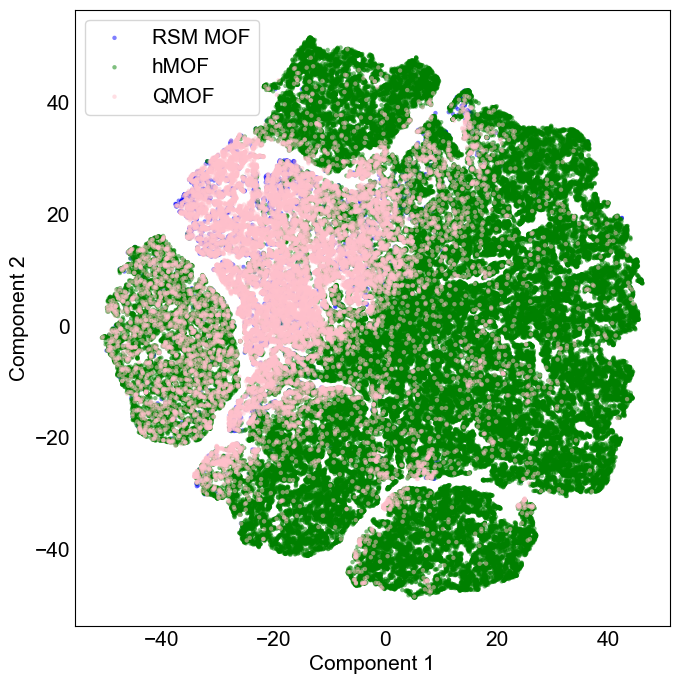

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_aspect('equal')

#plt.scatter(x=tsne[:, 0], y=tsne[:, 1], s=20, edgecolor="None", c=emb_color, alpha=.5)
plt.scatter(x=emb_rsm[:, 0], y=emb_rsm[:, 1], s=10, edgecolor="None", c="blue", alpha=.5, label="RSM MOF")
plt.scatter(x=emb_hmof[:, 0], y=emb_hmof[:, 1], s=10, edgecolor="None", c="green", alpha=.5, label="hMOF")
plt.scatter(x=emb_qmof[:, 0], y=emb_qmof[:, 1], s=10, edgecolor="None", c="pink", alpha=.5, label="QMOF")

ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")

ax.legend()
plt.show()

In [40]:
df_to_eva = df_infp
hash_name = "info.decorated_graph_hash"

NameError: name 'df_infp' is not defined

In [42]:
vc = df_to_eva[hash_name].value_counts()
vc = vc[vc > 4]
vc

5b4049b8ab89d48cfaa061da457d9af3    8
be18a99e096bf9c5010eecd2cd5524e1    6
75c55be611e6559b5aedf5e67fff258d    6
1bf89b957bd4db60371cbfe83ef7feb9    6
5037f8bc7b8b82b7673ce14023834a2f    5
16a02d03d7994da96ad46519e07dffd3    5
acd903e2c511dce20e8ae50aa5b414ba    5
be25517b64f44df0387e16250d4e768b    5
01f0bf951d9f4b7454e49215c2029724    5
Name: info.undecorated_graph_hash, dtype: int64

In [43]:
groups = []
for hash in list(vc.keys()):
    groups.append(list(df_to_eva[df_to_eva[hash_name] == hash]["mofid"]))

color_idx = [[df.index.get_loc(name) for name in group] for group in groups]

In [33]:
groups

[['qmof-6318e01',
  'qmof-0c858c4',
  'qmof-fbf7e41',
  'qmof-c41123e',
  'qmof-525bc94',
  'qmof-7f22f47',
  'qmof-e2c3312',
  'qmof-80be73f'],
 ['qmof-af9c10f',
  'qmof-98b863e',
  'qmof-ef3c6e0',
  'qmof-da0a751',
  'qmof-92d0d93',
  'qmof-33487ab'],
 ['qmof-b0e2c87',
  'qmof-9ee6b62',
  'qmof-3af7fe3',
  'qmof-8c5fcb0',
  'qmof-f8fb414',
  'qmof-5dabe7d'],
 ['qmof-d0ad78c',
  'qmof-6a2f4c9',
  'qmof-a820aa0',
  'qmof-ec24300',
  'qmof-1e91b84',
  'qmof-308fadd'],
 ['qmof-176c460',
  'qmof-0d21efa',
  'qmof-c43eb20',
  'qmof-4eb4dda',
  'qmof-38ae05d'],
 ['qmof-2e10675',
  'qmof-9a8be97',
  'qmof-7961300',
  'qmof-fa02d60',
  'qmof-04cece3'],
 ['qmof-545a299',
  'qmof-9513924',
  'qmof-2f9f102',
  'qmof-c98e6d4',
  'qmof-e273077'],
 ['qmof-c8860bc',
  'qmof-baa76cb',
  'qmof-362bef5',
  'qmof-4300cc0',
  'qmof-0f9e66f'],
 ['qmof-7f3ae47',
  'qmof-87f81b7',
  'qmof-790e2d4',
  'qmof-80b4f23',
  'qmof-e4e6540'],
 ['qmof-ba03fca', 'qmof-3e2d080', 'qmof-09f32f8', 'qmof-d08b940'],
 ['qmo

In [38]:
"""
color_idx = []
for group in groups:
    group_idx = []
    for name in group:
        search_name = (name+".cif").rstrip(".cif")
        group_idx.append(df.index.get_loc(search_name))
    color_idx.append(group_idx)
"""

'\ncolor_idx = []\nfor group in groups:\n    group_idx = []\n    for name in group:\n        search_name = (name+".cif").rstrip(".cif")\n        group_idx.append(df.index.get_loc(search_name))\n    color_idx.append(group_idx)\n'

In [35]:
color_list = ["red", "deepskyblue", "orange", "slateblue", "purple", "green", "hotpink", 
        "yellow", "cyan", "lime","darkviolet", "darkcyan", "cornflowerblue",
        "lightcoral", "maroon", "chocolate", "lawngreen", "gold", 
        "olive", "turquoise", "teal", "blue", "slategray", "darkseagreen",
        "mediumblue", "plum", "thistle", "orchid", "black", "lightslategrey", "saddlebrown"
        ]

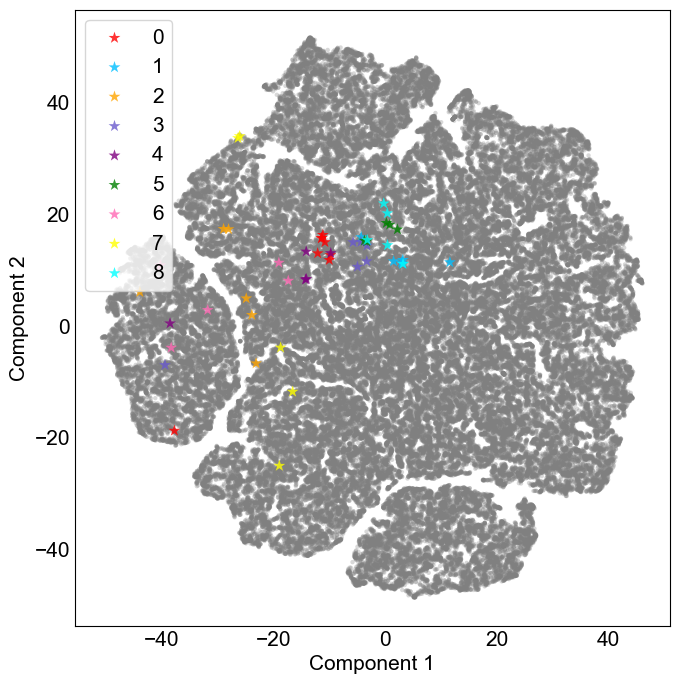

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_aspect('equal')

plt.scatter(x=tsne[:, 0], y=tsne[:, 1], s=10, edgecolor="None", c="grey", alpha=0.3)
for id, group in enumerate(color_idx):
    if id < len(color_list):
        plt.scatter(x=tsne[group, 0], y=tsne[group, 1], marker="*", s=80, edgecolor="None", color=color_list[id], alpha=0.8, label=id)
    elif id < 2 * len(color_list)-1:
        c_id = id - len(color_list)
        plt.scatter(x=tsne[group, 0], y=tsne[group, 1], marker="X", s=40, edgecolor="None", color=color_list[c_id], alpha=0.8, label=id)
    elif id < 3 * len(color_list)-1:
        c_id = id - len(color_list) * 2
        plt.scatter(x=tsne[group, 0], y=tsne[group, 1], marker="s", s=40, edgecolor="None", color=color_list[c_id], alpha=0.8, label=id)
    elif id < 4 * len(color_list)-1:
        c_id = id - len(color_list) * 3
        plt.scatter(x=tsne[group, 0], y=tsne[group, 1], marker="P", s=60, edgecolor="None", color=color_list[c_id], alpha=0.8, label=id)
    elif id < 5 * len(color_list)-1:
        c_id = id - len(color_list) * 4
        plt.scatter(x=tsne[group, 0], y=tsne[group, 1], marker="v", s=80, edgecolor="None", color=color_list[c_id], alpha=0.8, label=id)
    elif id < 6 * len(color_list)-1:
        c_id = id - len(color_list) * 5
        plt.scatter(x=tsne[group, 0], y=tsne[group, 1], marker="8", s=80, edgecolor="None", color=color_list[c_id], alpha=0.8, label=id)
    elif id < 7 * len(color_list)-1:
        c_id = id - len(color_list) * 6
        plt.scatter(x=tsne[group, 0], y=tsne[group, 1], marker="3", s=80, color=color_list[c_id], alpha=0.8, label=id)


ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.legend()

plt.show()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-4.098606  , -3.81660915, -3.5346123 , -3.25261545, -2.9706186 ,
        -2.68862175, -2.4066249 , -2.12462805, -1.8426312 , -1.56063435,
        -1.2786375 , -0.99664065, -0.7146438 , -0.43264695, -0.1506501 ,
         0.13134675,  0.4133436 ,  0.69534045,  0.9773373 ,  1.25933415,
         1.541331  ,  1.82332785,  2.1053247 ,  2.38732155,  2.6693184 ,
         2.95131525,  3.2333121 ,  3.51530895,  3.7973058 ,  4.07930265,
         4.3612995 ]),
 <a list of 64 BarContainer objects>)

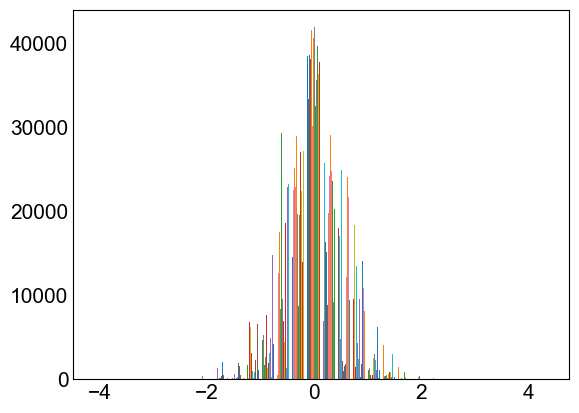

In [21]:
plt.hist(df.values, bins=30)